In [1]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.applications import resnet50, inception_v3

Using TensorFlow backend.


In [2]:
def read_img(img_name):
    img64 = Image.open(img_name).convert('RGB')
    img32 = img64.resize((32, 32),Image.ANTIALIAS)
    data = np.array(img32)
    return data

In [3]:
images = []
labels = []
dir = './/tiny-imagenet-200//train//'
i = 0
# counter = 0
for folder in os.listdir(dir):
    folderpath = dir + folder +'/images/'
    for file in os.listdir(folderpath):
        if file.endswith('.JPEG'):
            filedir = folderpath + file
            images.append(read_img(filedir))
            labels.append(i)
#             counter += 1
#             if counter > 64:
#                 break
    i = i+1
        
seed = 100
np.random.seed(seed)
num_classes = 200
x = np.array(images)
y = np.array(labels)
y = keras.utils.to_categorical(y, num_classes)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=seed)

In [4]:
np.random.seed(1000)
#Instantiate an empty model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(32,32,3), kernel_size=(11,11), strides=(4,4), padding='same'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

# Passing it to a Fully Connected layer
model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(4096, input_shape=(32*32*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))

# 2nd Fully Connected Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))

# 3rd Fully Connected Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))

# Output Layer
model.add(Dense(200))
model.add(Activation('softmax'))

model.summary()

# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 8, 8, 96)          34944     
_________________________________________________________________
activation_1 (Activation)    (None, 8, 8, 96)          0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 96)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 256)         2973952   
_________________________________________________________________
activation_2 (Activation)    (None, 4, 4, 256)         0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 256)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 2, 2, 384)         885120    
__________

In [7]:
hist = model.fit(x_train, y_train,
              batch_size=46,
              epochs=500,
              validation_data=(x_test, y_test),
              shuffle=True)

Train on 70000 samples, validate on 30000 samples
Epoch 1/500
70000/70000 [==============================] - 47s 668us/step - loss: 5.3018 - acc: 0.0048 - val_loss: 5.2993 - val_acc: 0.0041
Epoch 2/500
70000/70000 [==============================] - 42s 601us/step - loss: 5.2988 - acc: 0.0047 - val_loss: 5.3000 - val_acc: 0.0041
Epoch 3/500
70000/70000 [==============================] - 42s 600us/step - loss: 5.2987 - acc: 0.0050 - val_loss: 5.3005 - val_acc: 0.0041
Epoch 4/500
70000/70000 [==============================] - 42s 600us/step - loss: 5.2986 - acc: 0.0047 - val_loss: 5.3007 - val_acc: 0.0041
Epoch 5/500
70000/70000 [==============================] - 42s 601us/step - loss: 5.2986 - acc: 0.0051 - val_loss: 5.3008 - val_acc: 0.0041
Epoch 6/500
70000/70000 [==============================] - 42s 600us/step - loss: 5.2986 - acc: 0.0050 - val_loss: 5.3008 - val_acc: 0.0041
Epoch 7/500
70000/70000 [==============================] - 42s 600us/step - loss: 5.2986 - acc: 0.0050 - val_l

Epoch 59/500
70000/70000 [==============================] - 42s 601us/step - loss: 5.2987 - acc: 0.0048 - val_loss: 5.3009 - val_acc: 0.0041
Epoch 60/500
70000/70000 [==============================] - 42s 601us/step - loss: 5.2986 - acc: 0.0050 - val_loss: 5.3009 - val_acc: 0.0041
Epoch 61/500
70000/70000 [==============================] - 42s 600us/step - loss: 5.2986 - acc: 0.0054 - val_loss: 5.3010 - val_acc: 0.0041
Epoch 62/500
70000/70000 [==============================] - 42s 601us/step - loss: 5.2987 - acc: 0.0047 - val_loss: 5.3010 - val_acc: 0.0041
Epoch 63/500
70000/70000 [==============================] - 42s 601us/step - loss: 5.2987 - acc: 0.0052 - val_loss: 5.3010 - val_acc: 0.0041
Epoch 64/500
70000/70000 [==============================] - 42s 600us/step - loss: 5.2986 - acc: 0.0050 - val_loss: 5.3010 - val_acc: 0.0041
Epoch 65/500
70000/70000 [==============================] - 42s 600us/step - loss: 5.2986 - acc: 0.0051 - val_loss: 5.3010 - val_acc: 0.0041
Epoch 66/500


Epoch 117/500
70000/70000 [==============================] - 42s 600us/step - loss: 5.2986 - acc: 0.0050 - val_loss: 5.3010 - val_acc: 0.0041
Epoch 118/500
70000/70000 [==============================] - 42s 600us/step - loss: 5.2986 - acc: 0.0046 - val_loss: 5.3009 - val_acc: 0.0041
Epoch 119/500
70000/70000 [==============================] - 42s 601us/step - loss: 5.2986 - acc: 0.0050 - val_loss: 5.3010 - val_acc: 0.0041
Epoch 120/500
70000/70000 [==============================] - 42s 600us/step - loss: 5.2987 - acc: 0.0051 - val_loss: 5.3009 - val_acc: 0.0041
Epoch 121/500
70000/70000 [==============================] - 42s 600us/step - loss: 5.2986 - acc: 0.0048 - val_loss: 5.3010 - val_acc: 0.0041
Epoch 122/500
70000/70000 [==============================] - 42s 600us/step - loss: 5.2986 - acc: 0.0049 - val_loss: 5.3010 - val_acc: 0.0041
Epoch 123/500
70000/70000 [==============================] - 42s 600us/step - loss: 5.2987 - acc: 0.0047 - val_loss: 5.3009 - val_acc: 0.0041
Epoch 

Epoch 232/500
70000/70000 [==============================] - 42s 600us/step - loss: 5.2986 - acc: 0.0050 - val_loss: 5.3010 - val_acc: 0.0041
Epoch 233/500
70000/70000 [==============================] - 42s 601us/step - loss: 5.2987 - acc: 0.0052 - val_loss: 5.3009 - val_acc: 0.0041
Epoch 234/500
70000/70000 [==============================] - 42s 600us/step - loss: 5.2986 - acc: 0.0050 - val_loss: 5.3009 - val_acc: 0.0041
Epoch 235/500
70000/70000 [==============================] - 42s 601us/step - loss: 5.2987 - acc: 0.0050 - val_loss: 5.3010 - val_acc: 0.0041
Epoch 236/500
70000/70000 [==============================] - 42s 600us/step - loss: 5.2986 - acc: 0.0049 - val_loss: 5.3009 - val_acc: 0.0041
Epoch 237/500
70000/70000 [==============================] - 42s 600us/step - loss: 5.2987 - acc: 0.0050 - val_loss: 5.3009 - val_acc: 0.0041
Epoch 238/500
70000/70000 [==============================] - 42s 600us/step - loss: 5.2986 - acc: 0.0051 - val_loss: 5.3009 - val_acc: 0.0043
Epoch 

Epoch 290/500
70000/70000 [==============================] - 42s 601us/step - loss: 5.2987 - acc: 0.0053 - val_loss: 5.3010 - val_acc: 0.0041
Epoch 291/500
70000/70000 [==============================] - 42s 600us/step - loss: 5.2987 - acc: 0.0051 - val_loss: 5.3009 - val_acc: 0.0041
Epoch 292/500
70000/70000 [==============================] - 42s 600us/step - loss: 5.2986 - acc: 0.0045 - val_loss: 5.3009 - val_acc: 0.0041
Epoch 293/500
70000/70000 [==============================] - 42s 600us/step - loss: 5.2986 - acc: 0.0049 - val_loss: 5.3009 - val_acc: 0.0041
Epoch 294/500
70000/70000 [==============================] - 42s 600us/step - loss: 5.2987 - acc: 0.0050 - val_loss: 5.3009 - val_acc: 0.0041
Epoch 295/500
70000/70000 [==============================] - 42s 600us/step - loss: 5.2986 - acc: 0.0052 - val_loss: 5.3009 - val_acc: 0.0041
Epoch 296/500
70000/70000 [==============================] - 42s 600us/step - loss: 5.2986 - acc: 0.0051 - val_loss: 5.3009 - val_acc: 0.0041
Epoch 

Epoch 405/500
70000/70000 [==============================] - 42s 600us/step - loss: 5.2986 - acc: 0.0049 - val_loss: 5.3010 - val_acc: 0.0041
Epoch 406/500
70000/70000 [==============================] - 42s 601us/step - loss: 5.2986 - acc: 0.0052 - val_loss: 5.3010 - val_acc: 0.0041
Epoch 407/500
70000/70000 [==============================] - 42s 600us/step - loss: 5.2987 - acc: 0.0052 - val_loss: 5.3009 - val_acc: 0.0041
Epoch 408/500
70000/70000 [==============================] - 42s 600us/step - loss: 5.2986 - acc: 0.0052 - val_loss: 5.3009 - val_acc: 0.0041
Epoch 409/500
70000/70000 [==============================] - 42s 600us/step - loss: 5.2986 - acc: 0.0048 - val_loss: 5.3009 - val_acc: 0.0041
Epoch 410/500
70000/70000 [==============================] - 42s 600us/step - loss: 5.2986 - acc: 0.0048 - val_loss: 5.3009 - val_acc: 0.0041
Epoch 411/500
70000/70000 [==============================] - 42s 601us/step - loss: 5.2986 - acc: 0.0051 - val_loss: 5.3009 - val_acc: 0.0041
Epoch 

In [8]:
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_alex_model.h5'
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Saved trained model at C:\Users\em940\Desktop\INFO7374\saved_models\keras_alex_model.h5 
30000/30000 [==============================] - 4s 140us/step
Test loss: 5.3009194610595705
Test accuracy: 0.0041


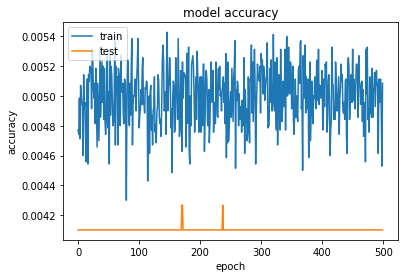

In [9]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

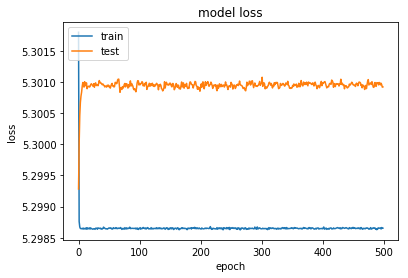

In [10]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [4]:
# AlexNet Define the Model
model = Sequential()
# model.add(Conv2D(96, (11,11), strides=(4,4), activation='relu', padding='same', input_shape=(img_height, img_width, channel,)))
# for original Alexnet
model.add(Conv2D(96, (3,3), strides=(2,2), activation='relu', padding='same', input_shape=(x_train.shape[1],x_train.shape[2],x_train.shape[3])))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
# Local Response normalization for Original Alexnet
model.add(BatchNormalization())

model.add(Conv2D(256, (5,5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2,2)))
# Local Response normalization for Original Alexnet
model.add(BatchNormalization())

model.add(Conv2D(384, (3,3), activation='relu', padding='same'))
model.add(Conv2D(384, (3,3), activation='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2,2)))
# Local Response normalization for Original Alexnet
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(4096, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


# print the model summary
model.summary()

# determine Loss function and Optimizer
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 16, 16, 96)        2688      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 96)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 96)          384       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 256)         614656    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 256)         0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 3, 3, 256)         1024      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 384)         885120    
__________

In [6]:
hist_1 = model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=100,
                    shuffle=True,
                   validation_data=(x_test, y_test))

Train on 70000 samples, validate on 30000 samples
Epoch 1/100
70000/70000 [==============================] - 39s 559us/step - loss: 5.1102 - acc: 0.0327 - val_loss: 5.3861 - val_acc: 0.0355
Epoch 2/100
70000/70000 [==============================] - 36s 512us/step - loss: 4.6098 - acc: 0.0603 - val_loss: 4.5494 - val_acc: 0.0611
Epoch 3/100
70000/70000 [==============================] - 36s 510us/step - loss: 4.3045 - acc: 0.0859 - val_loss: 4.3691 - val_acc: 0.0802
Epoch 4/100
70000/70000 [==============================] - 36s 511us/step - loss: 4.2756 - acc: 0.0885 - val_loss: 4.8967 - val_acc: 0.0478
Epoch 5/100
70000/70000 [==============================] - 36s 511us/step - loss: 4.2503 - acc: 0.0892 - val_loss: 4.3443 - val_acc: 0.0938
Epoch 6/100
70000/70000 [==============================] - 36s 511us/step - loss: 4.0700 - acc: 0.1109 - val_loss: 4.6566 - val_acc: 0.0733
Epoch 7/100
70000/70000 [==============================] - 36s 512us/step - loss: 3.9502 - acc: 0.1239 - val_l

In [7]:
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_alex_model1.h5'
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Saved trained model at C:\Users\em940\Desktop\INFO7374\saved_models\keras_alex_model1.h5 
30000/30000 [==============================] - 4s 133us/step
Test loss: 14.159581217447917
Test accuracy: 0.10366666666666667


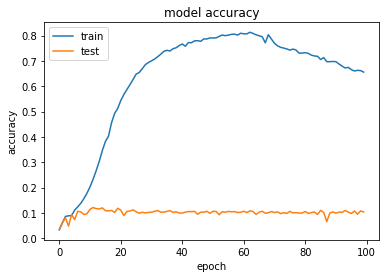

In [10]:
plt.plot(hist_1.history['acc'])
plt.plot(hist_1.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('alex model accuracy.png')

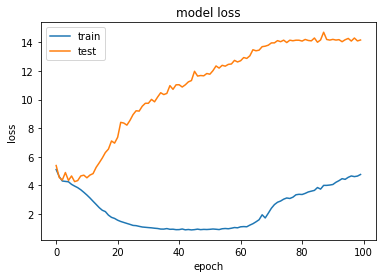

<Figure size 432x288 with 0 Axes>

In [14]:
plt.plot(hist_1.history['loss'])
plt.plot(hist_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('alex model loss.png')

In [5]:
hist_2 = model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=50,
                    shuffle=True,
                   validation_data=(x_test, y_test))

Train on 70000 samples, validate on 30000 samples
Epoch 1/50
70000/70000 [==============================] - 41s 583us/step - loss: 5.1748 - acc: 0.0291 - val_loss: 4.7624 - val_acc: 0.0508
Epoch 2/50
70000/70000 [==============================] - 37s 535us/step - loss: 5.0380 - acc: 0.0412 - val_loss: 4.8815 - val_acc: 0.0434
Epoch 3/50
70000/70000 [==============================] - 37s 533us/step - loss: 4.7770 - acc: 0.0651 - val_loss: 4.9138 - val_acc: 0.0528
Epoch 4/50
70000/70000 [==============================] - 37s 535us/step - loss: 4.6732 - acc: 0.0793 - val_loss: 4.6502 - val_acc: 0.0754
Epoch 5/50
70000/70000 [==============================] - 38s 544us/step - loss: 4.5038 - acc: 0.0962 - val_loss: 4.6641 - val_acc: 0.0821
Epoch 6/50
70000/70000 [==============================] - 37s 535us/step - loss: 4.4263 - acc: 0.1092 - val_loss: 4.7848 - val_acc: 0.0750
Epoch 7/50
70000/70000 [==============================] - 37s 534us/step - loss: 4.3269 - acc: 0.1207 - val_loss: 4.

In [9]:
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_alex_model2.h5'
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Saved trained model at C:\Users\em940\Desktop\INFO7374\saved_models\keras_alex_model2.h5 
30000/30000 [==============================] - 4s 132us/step
Test loss: 11.464195709228516
Test accuracy: 0.1251


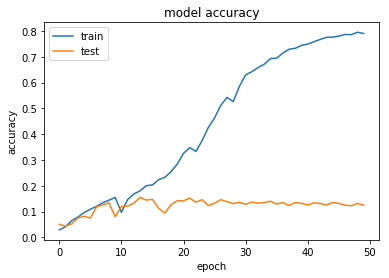

In [7]:
plt.plot(hist_2.history['acc'])
plt.plot(hist_2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

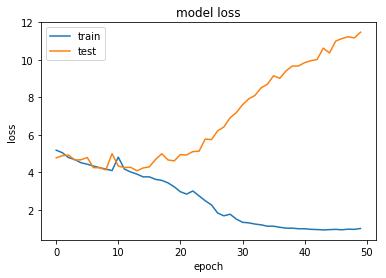

In [8]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [3]:
images = []
labels = []
dir = './/tiny-imagenet-200//train_2//'
i = 0
# counter = 0
for folder in os.listdir(dir):
    folderpath = dir + folder +'/images/'
    for file in os.listdir(folderpath):
        if file.endswith('.JPEG'):
            filedir = folderpath + file
            images.append(read_img(filedir))
            labels.append(i)
#             counter += 1
#             if counter > 64:
#                 break
    i = i+1
        
seed = 100
np.random.seed(seed)
num_classes = 200
x = np.array(images)
y = np.array(labels)
y = keras.utils.to_categorical(y, num_classes)
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=seed)

In [7]:
x_train = x
y_train = y 
print(x_train.shape)
print(y_train.shape)
# print(x_test.shape)
# print(y_test.shape)

(1000, 32, 32, 3)
(1000, 200)


In [8]:
hist = model.fit(x_train, y_train,
              batch_size=46,
              epochs=500,
              validation_split=0.1,
              shuffle=True)

Train on 900 samples, validate on 100 samples
Epoch 1/500
900/900 [==============================] - 8s 8ms/step - loss: 2.4564 - acc: 0.4767 - val_loss: 1.4819 - val_acc: 0.0000e+00
Epoch 2/500
900/900 [==============================] - 1s 777us/step - loss: 0.7001 - acc: 0.5633 - val_loss: 0.5939 - val_acc: 0.9900
Epoch 3/500
900/900 [==============================] - 1s 792us/step - loss: 0.5755 - acc: 0.6889 - val_loss: 0.2802 - val_acc: 0.9400
Epoch 4/500
900/900 [==============================] - 1s 780us/step - loss: 0.3934 - acc: 0.8456 - val_loss: 0.6059 - val_acc: 0.7100
Epoch 5/500
900/900 [==============================] - 1s 774us/step - loss: 0.3674 - acc: 0.8389 - val_loss: 0.3343 - val_acc: 0.9100
Epoch 6/500
900/900 [==============================] - 1s 784us/step - loss: 0.2860 - acc: 0.8878 - val_loss: 0.0831 - val_acc: 1.0000
Epoch 7/500
900/900 [==============================] - 1s 777us/step - loss: 0.2353 - acc: 0.9111 - val_loss: 0.4557 - val_acc: 0.8000
Epoch 8

Epoch 61/500
900/900 [==============================] - 1s 783us/step - loss: 0.0928 - acc: 0.9678 - val_loss: 0.3389 - val_acc: 0.9000
Epoch 62/500
900/900 [==============================] - 1s 784us/step - loss: 0.0623 - acc: 0.9778 - val_loss: 0.6678 - val_acc: 0.8600
Epoch 63/500
900/900 [==============================] - 1s 799us/step - loss: 0.1509 - acc: 0.9478 - val_loss: 0.2377 - val_acc: 0.9200
Epoch 64/500
900/900 [==============================] - 1s 796us/step - loss: 0.0762 - acc: 0.9744 - val_loss: 0.5497 - val_acc: 0.8600
Epoch 65/500
900/900 [==============================] - 1s 796us/step - loss: 0.0660 - acc: 0.9800 - val_loss: 0.2411 - val_acc: 0.9500
Epoch 66/500
900/900 [==============================] - 1s 784us/step - loss: 0.0376 - acc: 0.9867 - val_loss: 0.8208 - val_acc: 0.8300
Epoch 67/500
900/900 [==============================] - 1s 796us/step - loss: 0.0418 - acc: 0.9856 - val_loss: 0.4185 - val_acc: 0.9000
Epoch 68/500
900/900 [==========================

900/900 [==============================] - 1s 793us/step - loss: 0.0583 - acc: 0.9789 - val_loss: 0.4684 - val_acc: 0.8700
Epoch 122/500
900/900 [==============================] - 1s 776us/step - loss: 0.0211 - acc: 0.9922 - val_loss: 0.8279 - val_acc: 0.8800
Epoch 123/500
900/900 [==============================] - 1s 794us/step - loss: 0.0628 - acc: 0.9778 - val_loss: 0.4162 - val_acc: 0.8800
Epoch 124/500
900/900 [==============================] - 1s 772us/step - loss: 0.0209 - acc: 0.9922 - val_loss: 0.2226 - val_acc: 0.9400
Epoch 125/500
900/900 [==============================] - 1s 787us/step - loss: 0.0509 - acc: 0.9944 - val_loss: 1.3707 - val_acc: 0.8100
Epoch 126/500
900/900 [==============================] - 1s 794us/step - loss: 0.1194 - acc: 0.9611 - val_loss: 0.1327 - val_acc: 0.9500
Epoch 127/500
900/900 [==============================] - 1s 781us/step - loss: 0.1002 - acc: 0.9633 - val_loss: 0.4574 - val_acc: 0.8500
Epoch 128/500
900/900 [==============================] 

Epoch 181/500
900/900 [==============================] - 1s 770us/step - loss: 4.6763e-04 - acc: 1.0000 - val_loss: 0.7624 - val_acc: 0.8700
Epoch 182/500
900/900 [==============================] - 1s 804us/step - loss: 1.9181e-04 - acc: 1.0000 - val_loss: 0.8236 - val_acc: 0.8700
Epoch 183/500
900/900 [==============================] - 1s 784us/step - loss: 1.3261e-04 - acc: 1.0000 - val_loss: 0.8245 - val_acc: 0.8700
Epoch 184/500
900/900 [==============================] - 1s 782us/step - loss: 1.2173e-04 - acc: 1.0000 - val_loss: 0.8311 - val_acc: 0.8700
Epoch 185/500
900/900 [==============================] - 1s 777us/step - loss: 8.3465e-05 - acc: 1.0000 - val_loss: 0.8610 - val_acc: 0.8700
Epoch 186/500
900/900 [==============================] - 1s 797us/step - loss: 7.2092e-05 - acc: 1.0000 - val_loss: 0.8831 - val_acc: 0.8700
Epoch 187/500
900/900 [==============================] - 1s 777us/step - loss: 5.9692e-05 - acc: 1.0000 - val_loss: 0.9023 - val_acc: 0.8700
Epoch 188/500

Epoch 239/500
900/900 [==============================] - 1s 778us/step - loss: 2.9863e-06 - acc: 1.0000 - val_loss: 1.1806 - val_acc: 0.8700
Epoch 240/500
900/900 [==============================] - 1s 792us/step - loss: 1.6293e-06 - acc: 1.0000 - val_loss: 1.1821 - val_acc: 0.8700
Epoch 241/500
900/900 [==============================] - 1s 783us/step - loss: 2.4643e-06 - acc: 1.0000 - val_loss: 1.1847 - val_acc: 0.8700
Epoch 242/500
900/900 [==============================] - 1s 793us/step - loss: 1.6134e-06 - acc: 1.0000 - val_loss: 1.1834 - val_acc: 0.8700
Epoch 243/500
900/900 [==============================] - 1s 778us/step - loss: 4.7981e-06 - acc: 1.0000 - val_loss: 1.1849 - val_acc: 0.8700
Epoch 244/500
900/900 [==============================] - 1s 778us/step - loss: 3.4378e-06 - acc: 1.0000 - val_loss: 1.1821 - val_acc: 0.8700
Epoch 245/500
900/900 [==============================] - 1s 798us/step - loss: 2.4255e-06 - acc: 1.0000 - val_loss: 1.1791 - val_acc: 0.8700
Epoch 246/500

900/900 [==============================] - 1s 792us/step - loss: 3.5406e-07 - acc: 1.0000 - val_loss: 1.2948 - val_acc: 0.8700
Epoch 356/500
900/900 [==============================] - 1s 784us/step - loss: 5.1387e-07 - acc: 1.0000 - val_loss: 1.2921 - val_acc: 0.8700
Epoch 357/500
900/900 [==============================] - 1s 778us/step - loss: 1.3203e-06 - acc: 1.0000 - val_loss: 1.2973 - val_acc: 0.8700
Epoch 358/500
900/900 [==============================] - 1s 779us/step - loss: 9.5664e-07 - acc: 1.0000 - val_loss: 1.2961 - val_acc: 0.8700
Epoch 359/500
900/900 [==============================] - 1s 789us/step - loss: 1.0338e-06 - acc: 1.0000 - val_loss: 1.3258 - val_acc: 0.8700
Epoch 360/500
900/900 [==============================] - 1s 792us/step - loss: 3.4876e-07 - acc: 1.0000 - val_loss: 1.3296 - val_acc: 0.8700
Epoch 361/500
900/900 [==============================] - 1s 798us/step - loss: 4.4810e-07 - acc: 1.0000 - val_loss: 1.3261 - val_acc: 0.8700
Epoch 362/500
900/900 [====

900/900 [==============================] - 1s 780us/step - loss: 1.6001e-07 - acc: 1.0000 - val_loss: 1.3907 - val_acc: 0.8700
Epoch 472/500
900/900 [==============================] - 1s 781us/step - loss: 2.8650e-07 - acc: 1.0000 - val_loss: 1.3931 - val_acc: 0.8700
Epoch 473/500
900/900 [==============================] - 1s 786us/step - loss: 1.8749e-07 - acc: 1.0000 - val_loss: 1.3934 - val_acc: 0.8700
Epoch 474/500
900/900 [==============================] - 1s 779us/step - loss: 2.1974e-07 - acc: 1.0000 - val_loss: 1.3941 - val_acc: 0.8700
Epoch 475/500
900/900 [==============================] - 1s 781us/step - loss: 1.6312e-07 - acc: 1.0000 - val_loss: 1.3957 - val_acc: 0.8700
Epoch 476/500
900/900 [==============================] - 1s 769us/step - loss: 1.4669e-07 - acc: 1.0000 - val_loss: 1.3945 - val_acc: 0.8700
Epoch 477/500
900/900 [==============================] - 1s 788us/step - loss: 1.7703e-07 - acc: 1.0000 - val_loss: 1.3936 - val_acc: 0.8700
Epoch 478/500
900/900 [====

In [9]:
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_alex_model3.h5'
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Saved trained model at C:\Users\em940\Desktop\INFO7374\saved_models\keras_alex_model3.h5 
300/300 [==============================] - 0s 333us/step
Test loss: 0.18467551092307588
Test accuracy: 0.9833333333333333


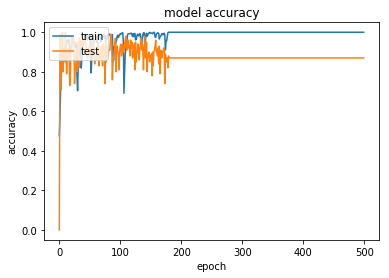

In [10]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

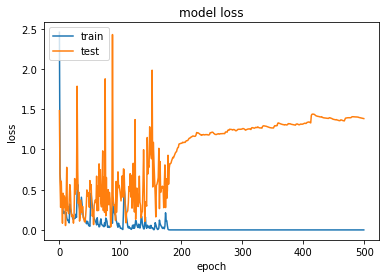

In [11]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()